## Image Count Summary + Directory Scan

Train Set Image Counts:
{'healthy': 830, 'peacock_spot': 1200, 'aculus_olearius': 690}

Test Set Image Counts:
{'healthy': 220, 'peacock_spot': 260, 'aculus_olearius': 200}


/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_96103/1021350876.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(train_counts.keys(), rotation=45)
/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_96103/1021350876.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(test_counts.keys(), rotation=45)


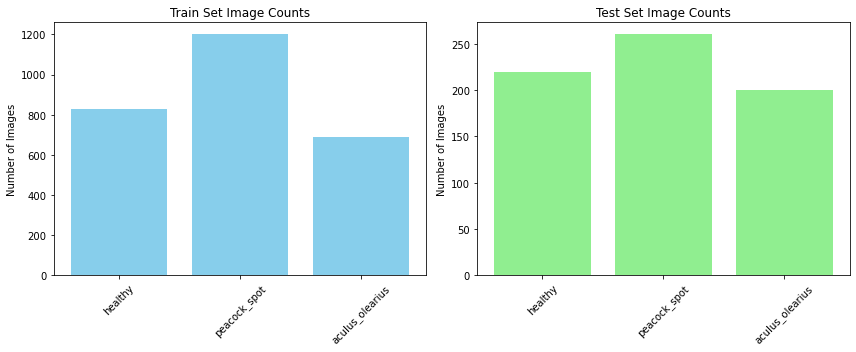

In [1]:
import os
import matplotlib.pyplot as plt

base_path = "/Users/halakhalifa/Desktop/Advanced ML/olive-disease-detector/data"

# Helper function to count images in each subfolder
def count_images(data_split):
    split_path = os.path.join(base_path, data_split)
    class_counts = {}
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if os.path.isfile(os.path.join(class_dir, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            class_counts[class_name] = num_images
    return class_counts

# Count images for both train and test
train_counts = count_images('train')
test_counts = count_images('test')

print("Train Set Image Counts:")
print(train_counts)

print("\nTest Set Image Counts:")
print(test_counts)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(train_counts.keys(), train_counts.values(), color='skyblue')
axs[0].set_title("Train Set Image Counts")
axs[0].set_ylabel("Number of Images")
axs[0].set_xticklabels(train_counts.keys(), rotation=45)

axs[1].bar(test_counts.keys(), test_counts.values(), color='lightgreen')
axs[1].set_title("Test Set Image Counts")
axs[1].set_ylabel("Number of Images")
axs[1].set_xticklabels(test_counts.keys(), rotation=45)

plt.tight_layout()
plt.show()

## Display Sample Images from Each Class

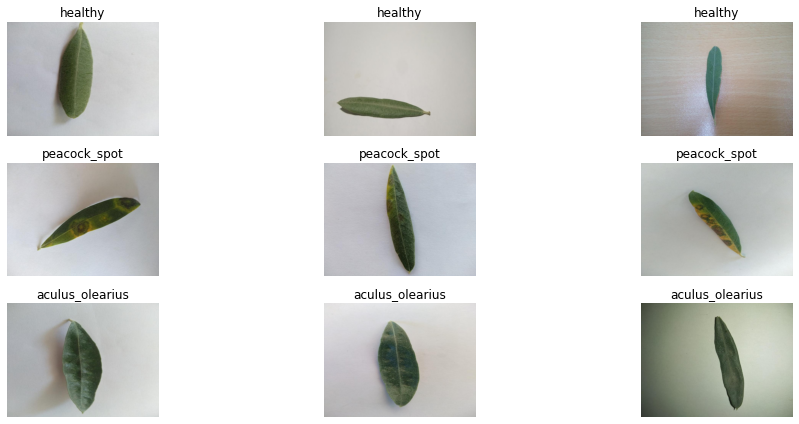

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Set up path
train_path = "/Users/halakhalifa/Desktop/Advanced ML/olive-disease-detector/data/train"
classes = ["healthy", "peacock_spot", "aculus_olearius"]

# Plot sample images
plt.figure(figsize=(15, 6))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_path, class_name)
    images = random.sample(os.listdir(class_dir), 3)
    
    for j, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        img = mpimg.imread(img_path)
        
        plt.subplot(len(classes), 3, i*3 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name}")

plt.tight_layout()
plt.show()

## Verify Image Shape, Size, and Channels

In [3]:
from PIL import Image
import numpy as np

# Select 5 random images from each class and check their size and shape
image_shapes = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)
    sample_images = random.sample(os.listdir(class_dir), 5)
    
    for img_name in sample_images:
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        img_array = np.array(img)
        print(f"{class_name}/{img_name} -> shape: {img_array.shape}, mode: {img.mode}")
        image_shapes.append(img_array.shape)

# Check unique shapes
unique_shapes = set(image_shapes)
print("\nUnique image shapes found:", unique_shapes)

healthy/B-202.JPG -> shape: (600, 800, 3), mode: RGB
healthy/B-310.JPG -> shape: (600, 800, 3), mode: RGB
healthy/B-369.jpg -> shape: (600, 800, 3), mode: RGB
healthy/B-677.jpg -> shape: (600, 800, 3), mode: RGB
healthy/B-767.JPG -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_151618.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_173110.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_143859.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190724_134611.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_143432.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/561.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/213.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/414.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/446.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/421.jpg -> shape: (600, 800, 3), mode: RGB

Unique image shapes found: {(600, 800, 3)}
